<a href="https://colab.research.google.com/github/chayaphon/DADS6003/blob/main/Classification/Logistic_Regression/stock_prediction.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
### Uncomment to install required library
# !pip install numpy
# !pip install pandas
# !pip install yfinance
# !pip install TA-Lib
# !pip install matplotlib
# !pip install scikit-learn

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
### Import Data
st = yf.Ticker('ptt.bk')
interval = '1h'
start = '2022-10-01'
end = '2023-12-31'
df = st.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-10-03 10:00:00+07:00,34.25,34.25,33.75,34.00,0,0.0,0.0
2022-10-03 11:00:00+07:00,34.00,34.25,34.00,34.25,11876309,0.0,0.0
2022-10-03 12:00:00+07:00,34.00,34.25,34.00,34.00,5620009,0.0,0.0
2022-10-03 14:00:00+07:00,34.00,34.25,34.00,34.00,5377777,0.0,0.0
2022-10-03 15:00:00+07:00,34.25,34.25,34.00,34.25,5994994,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,35.50,36.00,35.50,35.75,28387917,0.0,0.0
2023-12-28 12:00:00+07:00,35.75,36.00,35.75,35.75,484119,0.0,0.0
2023-12-28 14:00:00+07:00,35.75,36.00,35.75,35.75,1401463,0.0,0.0


# Part 1 : Standard Features

In [24]:
df1 = df.copy().dropna()

In [25]:
### Define Target/Dependent Variable
X = df1.iloc[:,:4]
y = np.where(df1['Close'].shift(-1) > df1['Close'],1,-1)

### Split dataset for training and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
split = int(0.7*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### Fit to model
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

### Coefficients
coefficients = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)), columns=['Feature', 'Coefficient'])
print(coefficients)

  Feature           Coefficient
0    Open  [0.3097111062701766]
1    High  [3.0020471824233135]
2     Low   [2.834543762308858]
3   Close  [-6.226604968812791]


In [26]:
### Actual and Pridiction with Prob
prediction = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1] 
result = X_test.copy()
result['Actual'] = y_test
result['Predict'] = prediction
result['probabilities'] = probabilities
result[result['probabilities']>= 0.5].head()

,Open,High,Low,Close,Actual,Predict,probabilities
Datetime,,,,,,,
2023-08-23 10:00:00+07:00,36.25,36.25,35.75,35.75,1,1,0.554638
2023-08-31 15:00:00+07:00,35.00,35.25,34.75,34.75,1,1,0.555348
2023-09-07 11:00:00+07:00,35.50,35.50,35.00,35.00,1,1,0.569461
2023-09-14 10:00:00+07:00,34.75,35.00,34.50,34.50,1,1,0.560300
2023-09-18 11:00:00+07:00,34.75,35.00,34.50,34.50,1,1,0.560300


In [27]:
### Model Accuracy
correct = len(result[result['Actual']==result['Predict']])
accuracy = correct/len(result)
print(f'Model accuracy : {accuracy*100:.2f}%')

Model accuracy : 74.82%


In [28]:
### Confusion Matrix
print(metrics.confusion_matrix(y_test, prediction))

[[389  13]
 [124  18]]


In [29]:
### Precision, Recall, and F1-Score
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       0.76      0.97      0.85       402
           1       0.58      0.13      0.21       142

    accuracy                           0.75       544
   macro avg       0.67      0.55      0.53       544
weighted avg       0.71      0.75      0.68       544



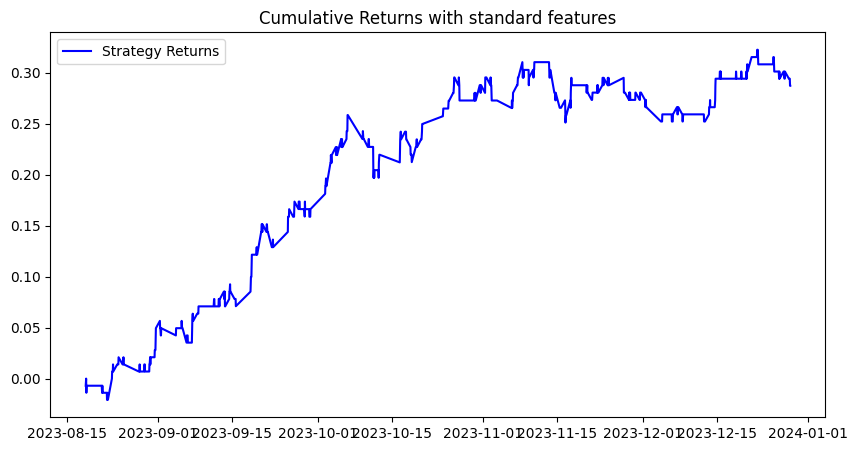

In [30]:
### Strategy returns
df1['Predicted_Signal'] = model.predict(X)
df1['Standard_returns'] = np.log(df1['Close']/df1['Close'].shift(1))
Cumulative_Standard_returns1 = np.cumsum(df1[split:]['Standard_returns'])

df1['Strategy_returns'] = df1['Standard_returns'] * df1['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns1 = np.cumsum(df1[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns1, color='b', label = 'Strategy Returns')
plt.title('Cumulative Returns with standard features')
plt.legend()
plt.show()

# Part 2 : Additional Feature

In [31]:
df2 = df.copy().dropna()

In [32]:
### Add feature

# Technical Indicators
import talib as ta

df2 = df2.iloc[:,:4]
df2['S_10'] = df2['Close'].rolling(window=10).mean()
df2['Corr'] = df2['Close'].rolling(window=10).corr(df2['S_10'])
df2['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df2['Open-Close'] = df2['Open'] - df2['Close'].shift(1)
df2['Open-Open'] = df2['Open'] - df2['Open'].shift(1)
df2 = df2.dropna()
df2

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2022-10-06 10:00:00+07:00,34.50,35.0,34.50,35.00,34.500,0.627703,69.609793,0.00,0.00
2022-10-06 11:00:00+07:00,35.00,35.0,34.50,35.00,34.575,0.707355,69.609793,0.00,0.50
2022-10-06 12:00:00+07:00,35.00,35.0,34.75,35.00,34.625,0.809630,69.609793,0.00,0.00
2022-10-06 14:00:00+07:00,34.75,35.0,34.75,35.00,34.675,0.853265,69.609793,-0.25,-0.25
2022-10-06 15:00:00+07:00,35.00,35.0,34.50,34.75,34.700,0.765135,57.775886,0.00,0.25
...,...,...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,35.50,36.0,35.50,35.75,35.625,0.394665,59.488657,-0.25,0.00
2023-12-28 12:00:00+07:00,35.75,36.0,35.75,35.75,35.650,0.329276,59.488657,0.00,0.25
2023-12-28 14:00:00+07:00,35.75,36.0,35.75,35.75,35.650,0.757282,59.488657,0.00,0.00


In [33]:
### Define Target/Dependent Variable
X = df2.iloc[:,:9]
y = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)

### Split dataset for training and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
split = int(0.7*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### Fit to model
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

### Coefficients
coefficients = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)), columns=['Feature', 'Coefficient'])
print(coefficients)

      Feature             Coefficient
0        Open  [0.062000625232278596]
1        High    [3.3027816819337277]
2         Low     [3.231734232746535]
3       Close    [-5.156934494536846]
4        S_10    [-1.480670304671652]
5        Corr  [-0.03127458619764369]
6         RSI   [-0.0399771298030099]
7  Open-Close   [0.13154250961938105]
8   Open-Open    [0.2642352858271246]


In [34]:
### Actual and Pridiction with Prob
prediction = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1] 
result = X_test.copy()
result['Actual'] = y_test
result['Predict'] = prediction
result['probabilities'] = probabilities
result[result['probabilities']>= 0.5].head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,Actual,Predict,probabilities
Datetime,,,,,,,,,,,,
2023-08-31 15:00:00+07:00,35.00,35.25,34.75,34.75,35.425,0.943210,21.329552,-0.25,-0.25,1,1,0.601827
2023-09-07 11:00:00+07:00,35.50,35.50,35.00,35.00,35.250,0.337869,42.552095,0.00,0.25,1,1,0.594624
2023-09-11 15:00:00+07:00,34.75,34.75,34.50,34.50,34.800,0.940051,27.033452,0.25,0.00,1,1,0.514200
2023-09-14 10:00:00+07:00,34.75,35.00,34.50,34.50,34.500,0.163517,46.388769,0.00,0.00,1,1,0.632821
2023-09-18 11:00:00+07:00,34.75,35.00,34.50,34.50,34.900,0.111249,40.378694,0.00,0.00,1,1,0.548342


In [35]:
### Model Accuracy
correct = len(result[result['Actual']==result['Predict']])
accuracy = correct/len(result)
print(f'Model accuracy : {accuracy*100:.2f}%')

Model accuracy : 74.16%


In [36]:
### Confusion Matrix
print(metrics.confusion_matrix(y_test, prediction))

[[379  18]
 [121  20]]


In [37]:
### Precision, Recall, and F1-Score
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       0.76      0.95      0.85       397
           1       0.53      0.14      0.22       141

    accuracy                           0.74       538
   macro avg       0.64      0.55      0.53       538
weighted avg       0.70      0.74      0.68       538



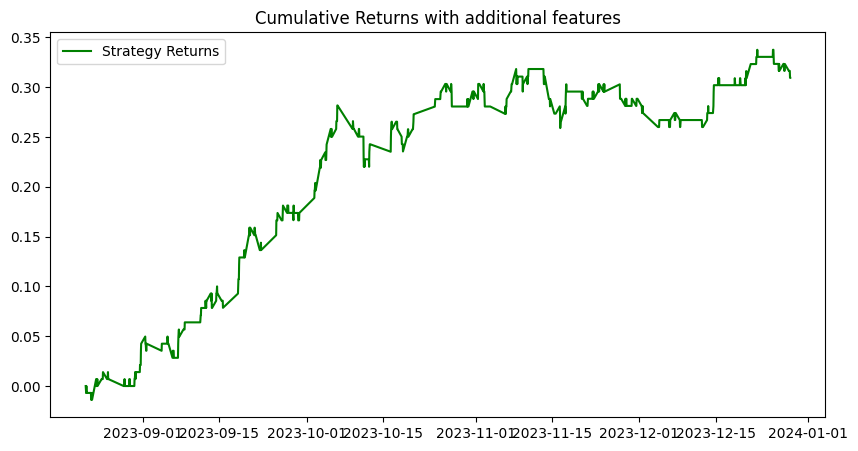

In [38]:
### Strategy returns
df2['Predicted_Signal'] = model.predict(X)
df2['Standard_returns'] = np.log(df2['Close']/df2['Close'].shift(1))
Cumulative_Standard_returns2 = np.cumsum(df2[split:]['Standard_returns'])

df2['Strategy_returns'] = df2['Standard_returns'] * df2['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns2 = np.cumsum(df2[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns2, color='g', label = 'Strategy Returns')
plt.title('Cumulative Returns with additional features')
plt.legend()
plt.show()

### Plot two graps of Srategy Returns (before and after adding new feature)

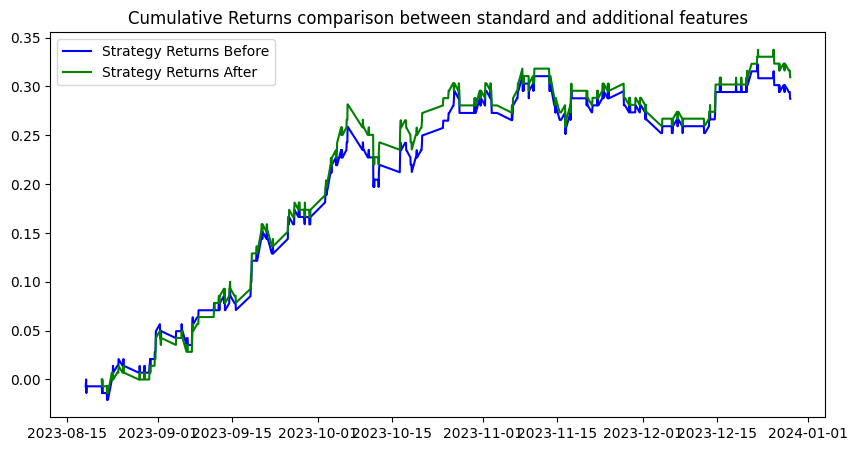

In [39]:
### Compare betweeen before and after adding new feautures
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns1, color='b', label = 'Strategy Returns Before')
plt.plot(Cumulative_Strategy_returns2, color='g', label = 'Strategy Returns After')
plt.title('Cumulative Returns comparison between standard and additional features')
plt.legend()
plt.show()